In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

plt.rcParams['ytick.left']=True
plt.rcParams['xtick.bottom']=True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False


from time import time

def timer(func):
    def wrapperfunc(*args):
        t0 = time()
        res = func(*args)
        print("%s took %1.3f seconds." % (func.__doc__,time()-t0))
        return res
    
    return wrapperfunc
    
    
"""
Code from Steve Bunton 
"""

# Define randomized SVD function
@timer
def rSVD(X,r,q,p):
    """randomized svd"""
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z,mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=False)
    U = Q @ UY

    return U, S, VT

@timer
def SVD(X,r):
    """svd"""
    U,S,Vh = np.linalg.svd(X,full_matrices=False)
    return U[:,:r], S[:r], Vh[:r]

randomized svd took 0.800 seconds.
svd took 0.710 seconds.


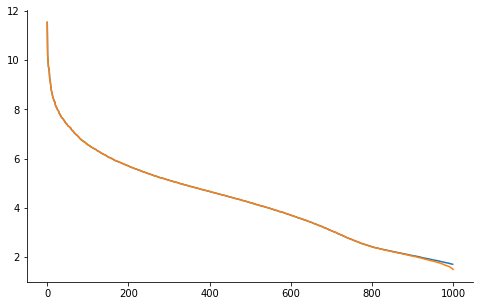

In [2]:
im = imageio.imread('img/IMG_1179.JPG')[:,:,0]

Ur,Sr,Vr = rSVD(im,1000,1,1)
U,S,V = SVD(im,1000)


plt.figure(figsize=(8,5))
plt.plot(np.log(S))
plt.plot(np.log(Sr))